In [1]:
# import libraries
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# load dataset: breast cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
# define Extra Trees model
et_model = ExtraTreesClassifier(
    n_estimators=100,          # ağaç sayısı
    max_depth=10,              # maksimum derinlik
    min_samples_split=5,       # bir düğümü bölmek için minimum örnek sayısı
    random_state=42
)

# training
et_model.fit(X_train, y_train)

# testing
y_pred = et_model.predict(X_test)

# evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9766081871345029
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        63
           1       0.97      0.99      0.98       108

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



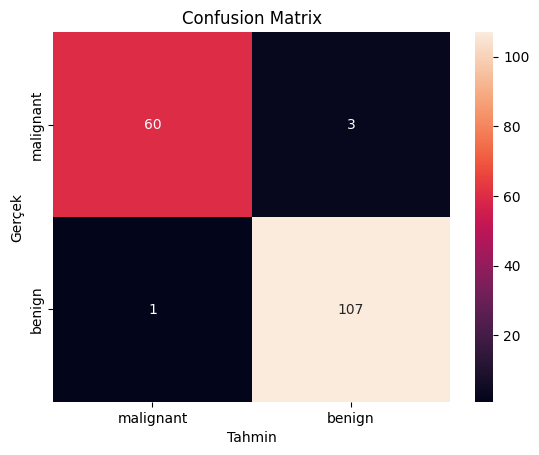

In [4]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.show()

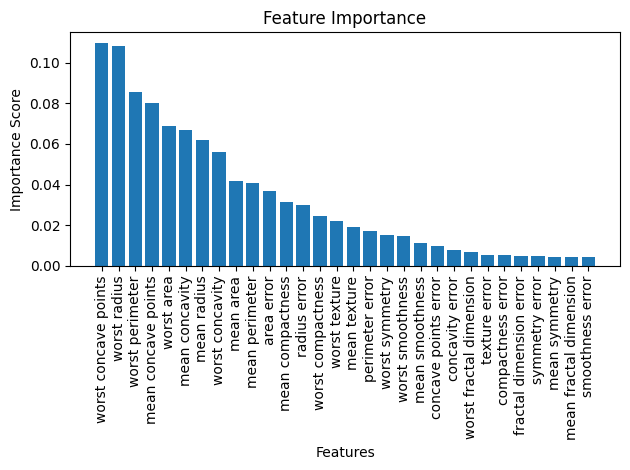

In [5]:
# feature importance visualization
feature_importance = et_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
features = cancer.feature_names

plt.figure()
plt.bar(range(X.shape[1]), feature_importance[sorted_idx], align="center")
plt.xticks(range(X.shape[1]), features[sorted_idx], rotation=90)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()
